<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation <br>
</center></h1>

<h2><center>Assignment 2 – PS7 [Weightage 13%]</center></h2>

## Instructions
<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
    <li><b><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready.Most effective visuals would fetch maximum credits</div></b></li>    
    <li><b><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></b></li>
    


  
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 48</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Shehza Fathima</td>
    <td>2021C104174</td>
  </tr>
  <tr>
    <td>Nithin Krishnan</td>
    <td>2021C104176</td>
  </tr>
  <tr>
    <td>Binsu Elizabeth Varghese</td>
    <td>2021C104187</td>
  </tr>
</table>

<h1>Objective</h1>
<h4>Perform EDA on the data set.</h4>



##  Download and Prep the Data: 1 Mark

<h4>Import the libraries needed</h4>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
from prettytable import PrettyTable
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

<h4> Load data and store in dataframe </h4>

In [2]:
#Loading Data from the csv file into dataframe df
df = pd.read_csv('dvi-a2-ps7-data.csv')
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,costofgoodssold,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,01-05-2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,03-08-2019,10:29,Cash,76.40,9.6


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [3]:
# Attribute and its datatype
ptbl = PrettyTable()

for attribute in df.columns:    
    ptbl.field_names = ["Attribute Name", "Data Type", "Unique Values"]
    ptbl.add_row([attribute, df[attribute].dtype, df[attribute].nunique()])
    
print(ptbl)

+-----------------+-----------+---------------+
|  Attribute Name | Data Type | Unique Values |
+-----------------+-----------+---------------+
|    Invoice ID   |   object  |      1000     |
|      Branch     |   object  |       3       |
|       City      |   object  |       3       |
|  Customer type  |   object  |       2       |
|      Gender     |   object  |       2       |
|   Product line  |   object  |       6       |
|    Unit price   |  float64  |      943      |
|     Quantity    |   int64   |       10      |
|      Total      |  float64  |      990      |
|       Date      |   object  |       89      |
|       Time      |   object  |      506      |
|     Payment     |   object  |       3       |
| costofgoodssold |  float64  |      990      |
|      Rating     |  float64  |       61      |
+-----------------+-----------+---------------+


#### Display the summary statistics of the data.In a markdown cell below,explain your findings

In [4]:
# (include = 'all'): Shows the statisitics of categorical as well as numerical variables
df.describe(include = 'all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,costofgoodssold,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,89,506,3,NaN,NaN
top,800-09-8606,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,02-07-2019,14:42,Ewallet,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,20,7,345,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,322.966749,NaN,NaN,NaN,307.58738,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,245.885335,NaN,NaN,NaN,234.17651,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,10.678500,NaN,NaN,NaN,10.17000,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,124.422375,NaN,NaN,NaN,118.49750,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,253.848000,NaN,NaN,NaN,241.76000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,471.350250,NaN,NaN,NaN,448.90500,8.50000


#### Identify whether male/female spends more on 'Health and beauty'.Write the code below

In [5]:
# Filtering out only the "Health and beauty" Product line values from the dataset
dfc = df.loc[df['Product line'] == 'Health and beauty']

# Grouping by Gender and calculating "Spends" by summing the "Total" field
dfCat = dfc[['Gender','Total']].groupby(['Gender'],as_index=False).sum().round(2)

# Sorting the results in decreasing order
dfCat.sort_values(by='Total', ascending=False)

,Gender,Total
1,Male,30632.75
0,Female,18560.99


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Check the distribution of the Price variable .<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual..<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
   

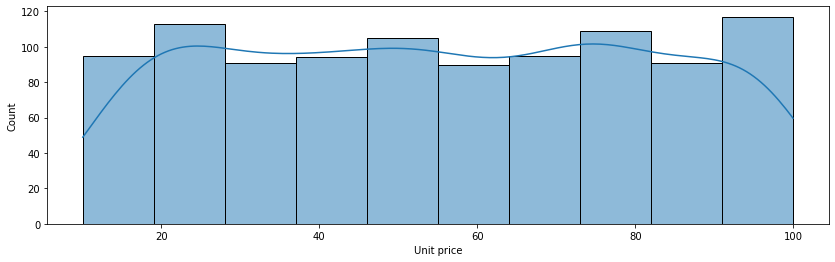

In [36]:
# Distribution of Unit Price (continuos) varaible
sns.histplot(data=df['Unit price'], bins=10, kde=True)

# Bars mute line highlight
# X, y Labels mute
# X, y values Mute

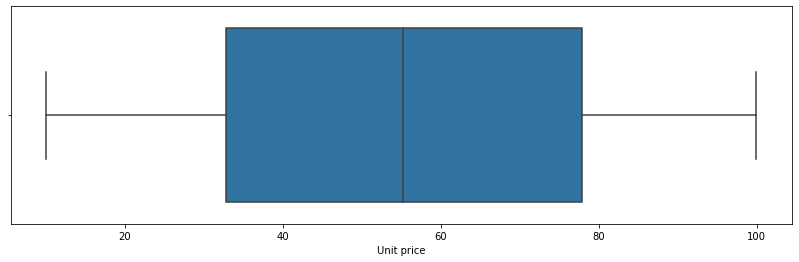

In [37]:
ax = sns.boxplot(x=df['Unit price'])

### Question 2
<h4>What does the distribution of customer rating looks like?Draw the mean,25th and 75th percentile on the plot.<br><br>
    Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  
   

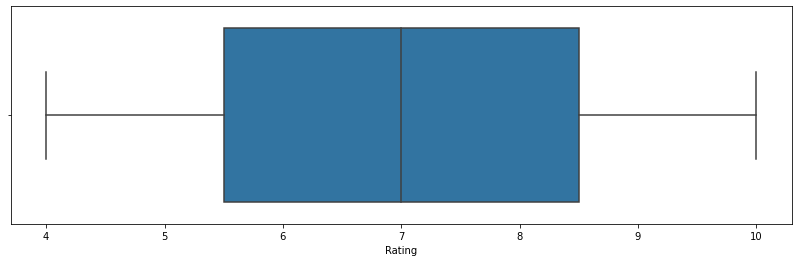

In [33]:
# Box plot
 
# Creating plot
# plt.boxplot(df['Rating'], vert=False)

ax = sns.boxplot(x=df['Rating'])

Highlight 25%, 50% 75%
Annotate values for these
Remove Borders
Remove BG
Annote with mute color the whiskers


### Question 3
<h4>For each payment method,compare the product lines.Does any stand out?.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

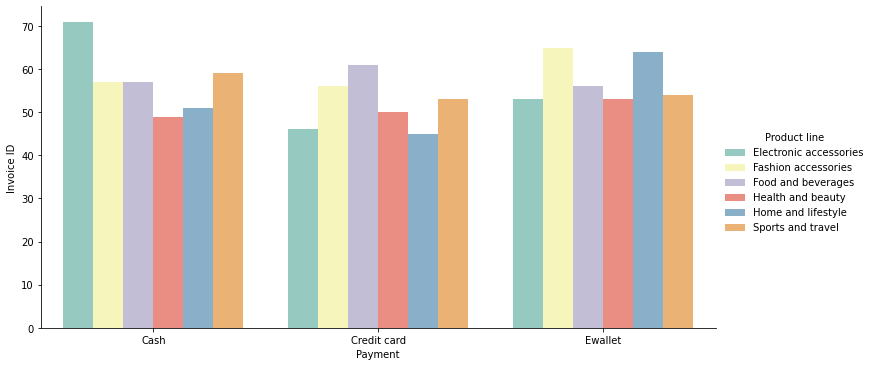

In [31]:
# Bar graph for Payment methods in product line


# perform groupby
# df1 = df.groupby(['Product line', 'Payment']).agg(mean_payment=("Payment", 'mean'))
# # df = df.reset_index()
  
# # plot barplot
# sns.barplot(x="Payment",
#            y="mean_payment",
# #            hue="attnr",
#            data=df1)


dfCat = df[['Payment','Product line','Invoice ID']].groupby(['Payment','Product line'],as_index=False).count()
sns.catplot(data=dfCat, y='Invoice ID', x='Payment', kind='bar', hue='Product line', height=5, aspect=2, palette="Set3")
plt.show()

### Question 4
<h4>Identify,which is the most appropriate time(hour) to give online disounts?<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .(Prep the data as necessary)
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

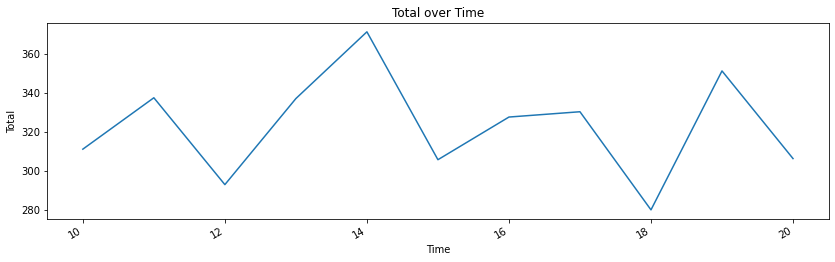

In [29]:
df4 = pd.read_csv('dvi-a2-ps7-data.csv', parse_dates=['Time'])

# Add date and Time Concat

plt.rcParams["figure.figsize"] = [14.00, 4.0]
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
answers = df.groupby(pd.Grouper(key='Time',freq='H')).mean()
dates = answers.index.hour
sums = answers['Total']
fig, ax = plt.subplots()
plt.plot(dates,sums)
plt.gcf().autofmt_xdate()
ax.set_xlabel("Time")
ax.set_ylabel("Total")
ax.set_title("Total over Time")
plt.show()

Remove box border
High Low Highlight
Add values in markers
Remove y axis
Remove ticks

### Question 5

<h4>Which product line is more profitable?<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .(Prep the data as necessary)
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

[Text(0, 0.5, '')]

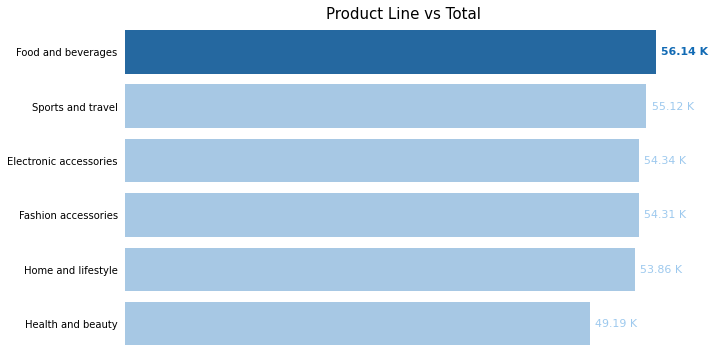

In [27]:
dfc5 = df.copy()
dfCat = dfc5[['Product line','Total']].groupby(['Product line'],as_index=False).sum().round(2)

#-----------> Calculate SP-CP

highLightColor = '#116ab4'
mutedColor = '#9dc9ee'

# Sorting the results in decreasing order
dfCat = dfCat.sort_values(by='Total', ascending=False)

# Plotting bar graph
values = dfCat['Total']
clrs = [mutedColor if (x < max(values)) else highLightColor for x in values ]
plt.figure(figsize=(10,6))
plots = sns.barplot(x="Total", y="Product line", data=dfCat, palette=clrs)
 
# Setting the title for the graph
plt.title("Product Line vs Total", size=15)


# GRAPH CURATION
# ---- 1) Adding annotations to the bars in graph ----

i=0;

# Iterrating over bars
for bar in plots.patches:
    
    if (i == 0):
        # Annotating points in the bars, fixing their position and values
        plots.annotate(format(((bar.get_width() / 1000)), '.2f')  + ' K',
                       (bar.get_width() * 1.01, i * (bar.get_height() + 0.2)),
                       va='center', size=11, xytext=(0, 0), textcoords='offset points',
                       weight='bold', color=highLightColor)
    else:
        # Annotating points in the bars, fixing their position and values
        plots.annotate(format(((bar.get_width() / 1000)), '.2f')  + ' K',
                       (bar.get_width() * 1.01, i * (bar.get_height() + 0.2)),
                       va='center', size=11, xytext=(0, 0), textcoords='offset points',
                       weight='normal', color=mutedColor)
    
    i = i + 1


# ---- 2) Removing unneccesary chart Borders ----
sns.despine(right=True, left=True, top=True, bottom=True)

# ---- 3) Removing unneccesary tick marks ----
plots.tick_params(left=False, bottom=False)

# ---- 4) Removing x values ----
plots.set(xticklabels=[])

# ---- 5) Removing x,y labels ----
plots.set(xlabel=None)
plots.set(ylabel=None)



# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

In [ ]:
Branch vs Count of Invoice ID

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>